In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
#df = pd.read_csv('../../data/anemia_synth_dataset_some_nans_unspecified_more_feats.csv')
#df = pd.read_csv('../../data/more_features/more_feats_new_labels_0.1.csv')
df = pd.read_csv('../../data/more_features/with_correlated_feature_0.1.csv')
df.head()

,hemoglobin,ferritin,ret_count,segmented_neutrophils,tibc,mcv,serum_iron,rbc,age,gender,indirect_bilirubin,transferrin,creatinine,cholestrol,copper,ethanol,folate,glucose,correlated_ret_count,label
0,11.183192,187.573466,4.951674,1.661383,316.593436,95.006424,181.242992,6.758433,60.586525,1,2.976104,282.291951,NaN,28.040619,96.721542,49.530542,23.186628,NaN,14.903348,Hemolytic anemia
1,14.387445,NaN,NaN,NaN,NaN,NaN,125.249617,6.350652,86.964793,1,2.968983,158.844879,NaN,98.357508,112.758764,62.464566,7.168920,NaN,NaN,No anemia
2,12.749357,5.012158,3.502800,6.179371,498.418768,76.759285,159.834784,5.018156,67.065069,1,2.705719,442.293823,1.022939,56.850479,75.739552,72.072041,20.600875,44.872138,12.005600,Iron deficiency anemia
3,11.508870,197.180945,1.200125,0.000000,457.033309,102.900301,131.177927,6.656823,66.403181,1,1.869338,223.896404,NaN,111.220307,66.999185,18.353272,14.132423,NaN,7.400250,Unspecified anemia
4,9.456656,427.952052,NaN,0.660252,NaN,104.543774,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vitamin B12/Folate deficiency anemia


In [18]:
df.isna().sum()

hemoglobin                   0
ferritin                 25000
ret_count                25000
segmented_neutrophils    22300
tibc                     25900
mcv                       5000
serum_iron               25900
rbc                      13300
age                      14000
gender                       0
indirect_bilirubin       19600
transferrin              25900
creatinine               38500
cholestrol               25900
copper                   25900
ethanol                  19600
folate                   25900
glucose                  51100
correlated_ret_count     25000
label                        0
dtype: int64

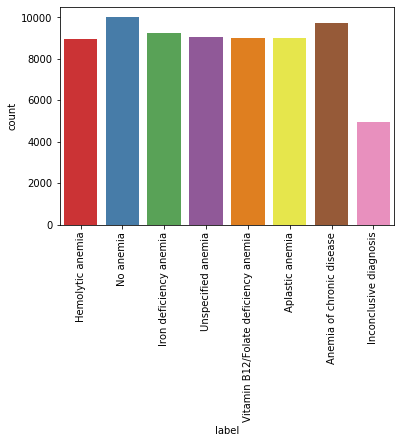

In [19]:
plt.xticks(rotation=90)
sns.countplot(x='label', data=df, palette = 'Set1')

In [5]:
def plot_feature_frequencies(df):
    output_df  = pd.DataFrame()
    for col in df.columns:
        if col != 'label':
            missing_num = df.isna().sum()[col]
            present_num = df.notna().sum()[col]
            col_dict = {'feature name':col, 'present': present_num, 'missing':missing_num,}
            output_df = output_df.append(col_dict, ignore_index=True)
    output_df = output_df[['feature name', 'present', 'missing']]
    output_df.plot(x='feature name', kind='bar', figsize=(8,6), stacked=True)
    return output_df

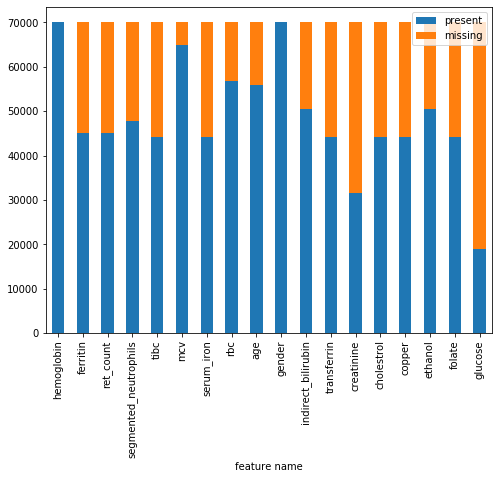

In [6]:
output_df = plot_feature_frequencies(df)

In [9]:
len(df)

70000

#### Correlation matrix

In [20]:
corr_cols = [col for col in df.columns if col not in ['gender', 'label', 'age']]
corr_df = df[corr_cols]
corr_df.corr()

,hemoglobin,ferritin,ret_count,segmented_neutrophils,tibc,mcv,serum_iron,rbc,indirect_bilirubin,transferrin,creatinine,cholestrol,copper,ethanol,folate,glucose,correlated_ret_count
hemoglobin,1.000000,0.050477,0.026527,0.071636,-0.076578,-0.005201,0.000594,-0.002275,0.003275,0.002932,-0.002385,-0.002550,-0.000079,0.001521,0.005741,-0.002869,0.026527
ferritin,0.050477,1.000000,-0.011303,-0.050028,-0.361505,0.249131,-0.001752,-0.005678,0.009518,0.011885,0.003610,0.010145,-0.003281,-0.000513,-0.000450,0.007710,-0.011303
ret_count,0.026527,-0.011303,1.000000,-0.053356,0.019873,0.025303,-0.000535,-0.001494,-0.002726,-0.006374,-0.002245,0.000637,-0.003757,0.007727,-0.001904,-0.006070,1.000000
segmented_neutrophils,0.071636,-0.050028,-0.053356,1.000000,0.025611,-0.306770,-0.007212,0.008497,0.003030,0.004126,0.002655,0.000799,0.003818,-0.006637,-0.004465,-0.002271,-0.053356
tibc,-0.076578,-0.361505,0.019873,0.025611,1.000000,-0.235020,-0.002446,0.003275,0.000850,0.000724,-0.023329,-0.004042,0.003040,0.002592,-0.001218,-0.019836,0.019873
mcv,-0.005201,0.249131,0.025303,-0.306770,-0.235020,1.000000,-0.001847,-0.003991,0.000038,-0.002554,0.002686,0.003877,-0.003144,0.005461,0.005495,-0.012808,0.025303
serum_iron,0.000594,-0.001752,-0.000535,-0.007212,-0.002446,-0.001847,1.000000,0.005369,-0.004636,0.003381,-0.001298,-0.000037,0.002514,0.003485,-0.001291,-0.004285,-0.000535
rbc,-0.002275,-0.005678,-0.001494,0.008497,0.003275,-0.003991,0.005369,1.000000,0.009635,-0.000834,0.005937,-0.002893,-0.004277,-0.004436,-0.008544,0.000761,-0.001494
indirect_bilirubin,0.003275,0.009518,-0.002726,0.003030,0.000850,0.000038,-0.004636,0.009635,1.000000,-0.000721,-0.001140,-0.002704,-0.002221,-0.002101,-0.002142,0.010687,-0.002726
transferrin,0.002932,0.011885,-0.006374,0.004126,0.000724,-0.002554,0.003381,-0.000834,-0.000721,1.000000,0.005712,0.000793,-0.001686,-0.002114,0.001439,-0.001310,-0.006374


In [21]:
def heat_map(df):
    plt.figure(figsize=(9,7))
    plt.title('Correlation Matrix')
    sns.heatmap(df, cmap='OrRd', linewidth=1)
    plt.show()

In [22]:
df.columns

Index(['hemoglobin', 'ferritin', 'ret_count', 'segmented_neutrophils', 'tibc',
       'mcv', 'serum_iron', 'rbc', 'age', 'gender', 'indirect_bilirubin',
       'transferrin', 'creatinine', 'cholestrol', 'copper', 'ethanol',
       'folate', 'glucose', 'correlated_ret_count', 'label'],
      dtype='object')

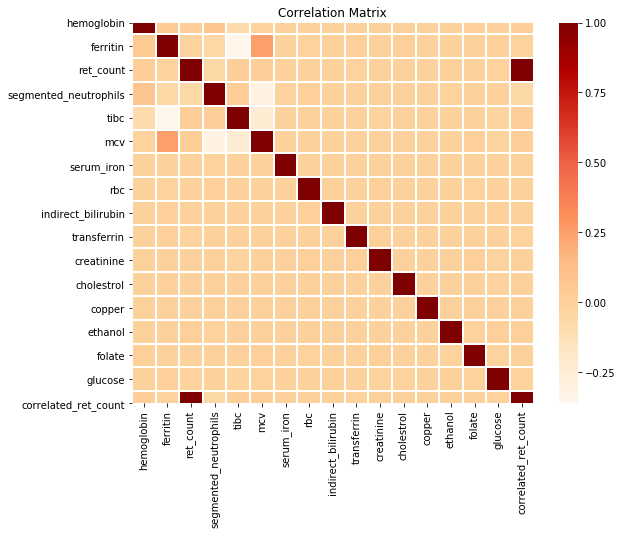

In [23]:
heat_map(corr_df.corr())